In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [10]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


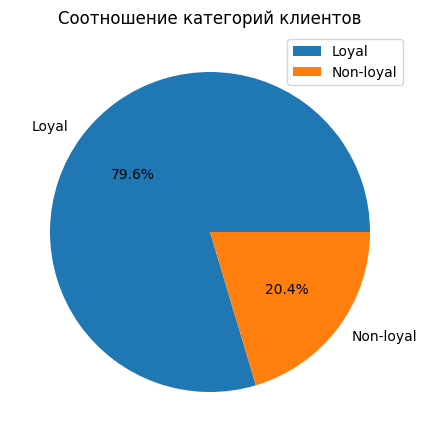

In [12]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий
# по соотношению.

churn_data['ExitedType'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Non-loyal')
exited = churn_data['ExitedType'].value_counts()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=exited.index,
    autopct='%.1f%%',
);
axes.legend()
axes.set_title('Соотношение категорий клиентов');

# В банке 20% клиентов - это ушедшие, т.е. каждый пятый клиент меняет банк.

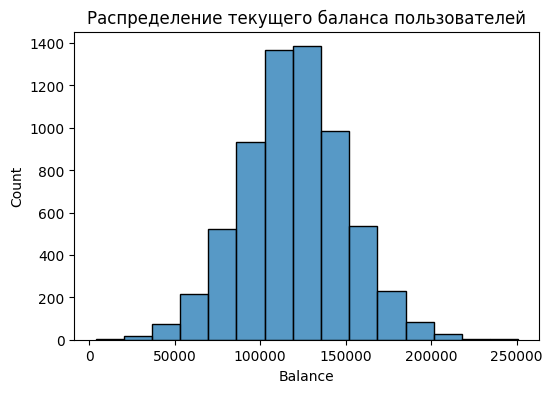

In [13]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых
# на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

balance2500 = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(6, 4))
hist = sns.histplot(
    data=balance2500,
    x='Balance',
    bins=15
);

hist.set_title('Распределение текущего баланса пользователей');

# Оснноные клиенты в диапазоне 100-120 т.р. До 30 т.р. и более 200 т.р. доля очень мала

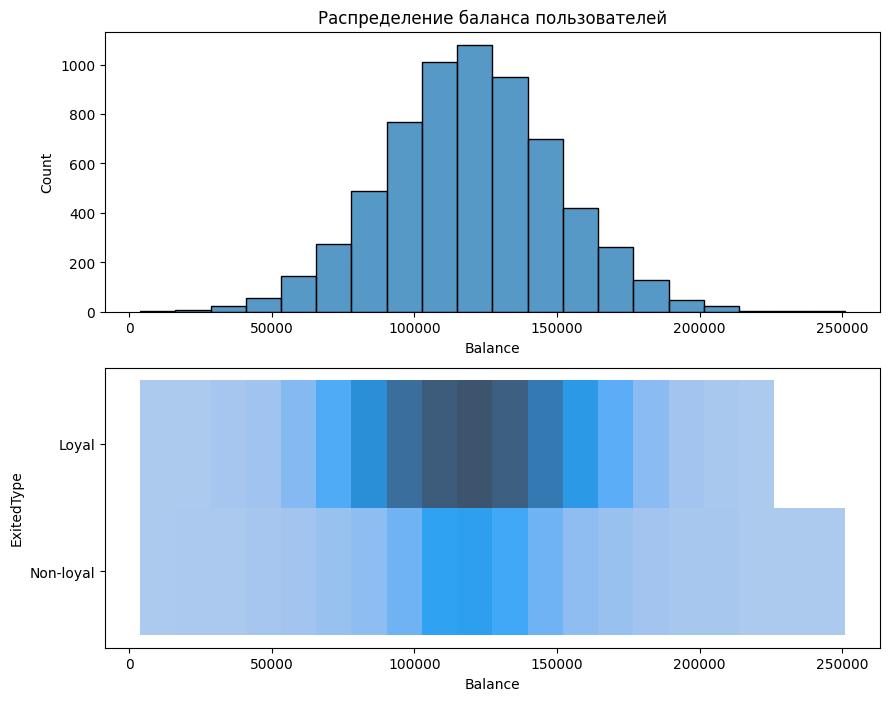

In [14]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите,
# с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=balance2500,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей');

sns.histplot(
    data=balance2500,
    x='Balance',
    y='ExitedType',
    bins=20,
    ax=axes[1]
);

# Клиенты, делающие вклады на суммы в диапазоне 80-160 тыс. руб. скорее станут лоляьными и 
# сохранят приверженность банку. Для клиентов на суммах до 50 т.р. и свыше 200 т.р. вероятность 
# ухода клиента существенно выше (по текущей аналитке приблизительно 50%). Скорее всего продукты 
# и сервис банка не соответсвуют ожиданиям клиентов.

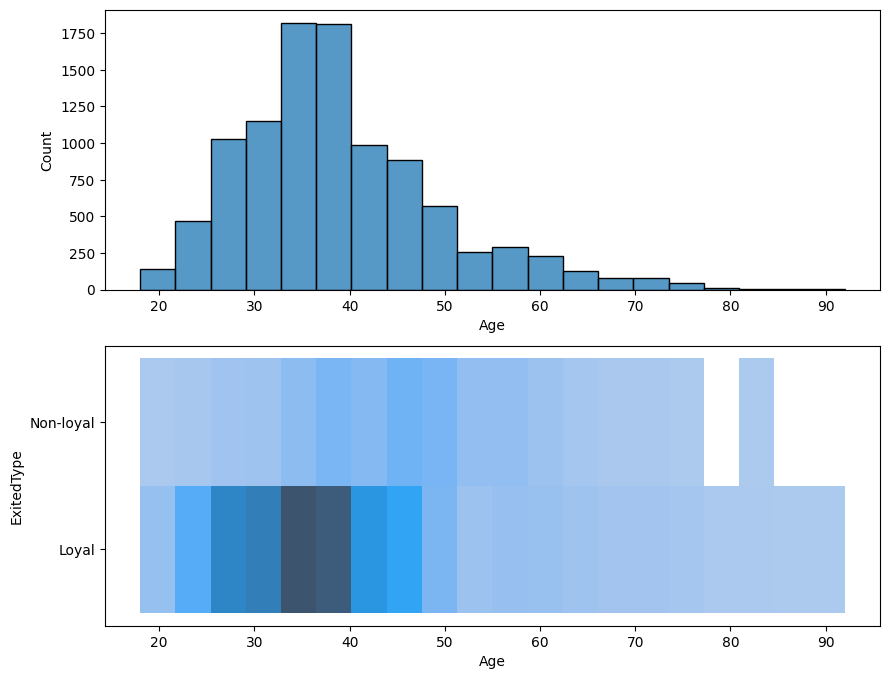

In [15]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе
# больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    data=churn_data,
    x='Age',
    bins=20,
    ax=axes[0]
)
sns.histplot(
    data=churn_data,
    x='Age',
    y='ExitedType',
    bins=20,
    ax=axes[1]
)
hist.set_title('Распределение возраста в разрезе признака оттока');

# Вывод после следующей диаграммы

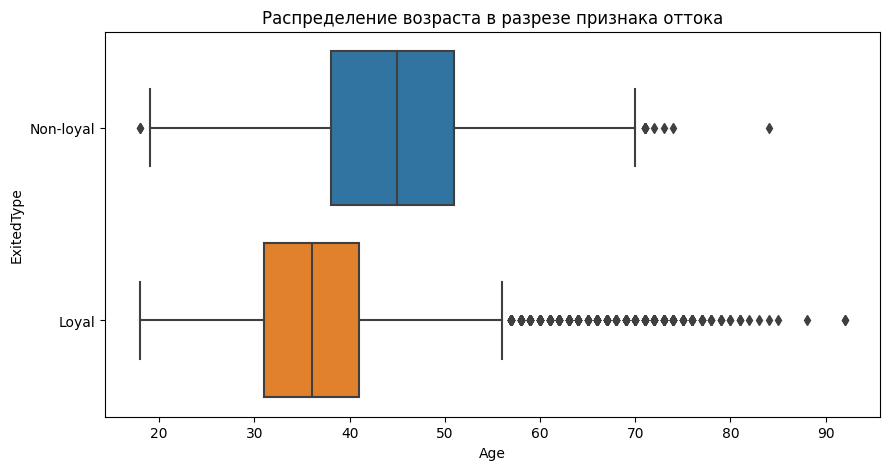

In [16]:
fig = plt.figure(figsize=(10, 5))
box = sns.boxplot(
    data=churn_data,
    x='Age',
    y='ExitedType'
)
box.set_title('Распределение возраста в разрезе признака оттока');

# В лоляьной группе больше выбросов.
# На клиентов старше 45 лет следуюет обратить особое внимание

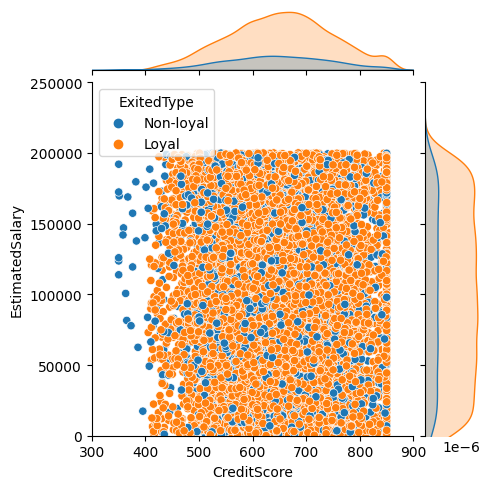

In [17]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента
# и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='ExitedType',
    xlim = (300, 900),
    ylim = (0, 250000),
    height=5
);

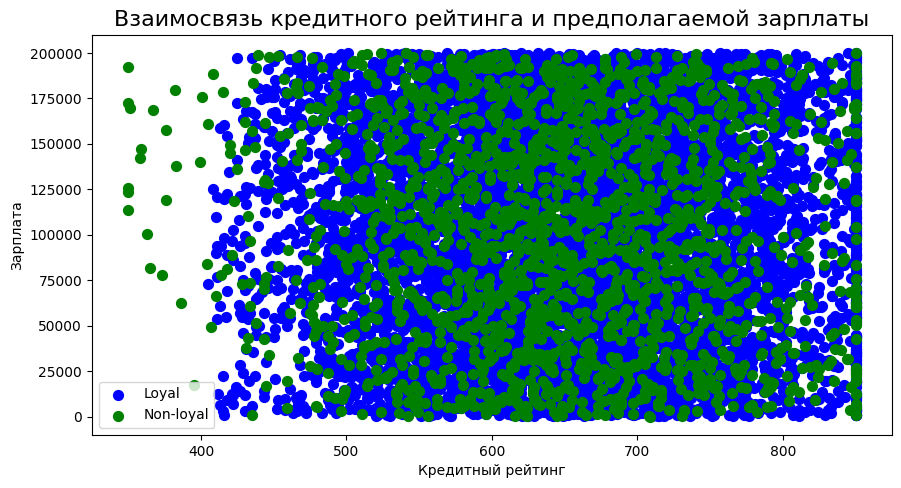

In [18]:
loyal_data = churn_data[churn_data['ExitedType'] == 'Loyal']
nonloyal_data = churn_data[churn_data['ExitedType'] == 'Non-loyal']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
line1 = axes.scatter(
    x=loyal_data['CreditScore'],
    y=loyal_data['EstimatedSalary'],
    s=50,
    c='blue'
);
line2 = axes.scatter(
    x=nonloyal_data['CreditScore'],
    y=nonloyal_data['EstimatedSalary'],
    s=50,
    c='green'
);
axes.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты', fontsize=16)
axes.set_xlabel('Кредитный рейтинг')
axes.set_ylabel('Зарплата')
axes.legend([line1, line2], ['Loyal', 'Non-loyal']);

In [19]:
# Очевидной взаимосвязи нет. Но еле улавлимая связь: наблюдается концетрация лояльных клиентов
# в средней зоне кредитного рейтинга.

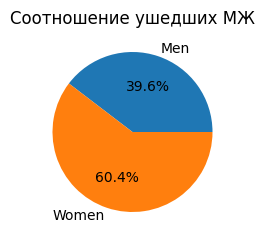

In [20]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

men_nonloyal = churn_data[churn_data['Gender'] == 'Male']['Exited'].mean()
women_nonloyal = churn_data[churn_data['Gender'] == 'Female']['Exited'].mean()
fig = plt.figure(figsize=(2, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    [men_nonloyal, women_nonloyal],
    labels=['Men', 'Women'],
    autopct='%.1f%%',
);
axes.set_title('Соотношение ушедших МЖ');

# Чаще уходят женщины

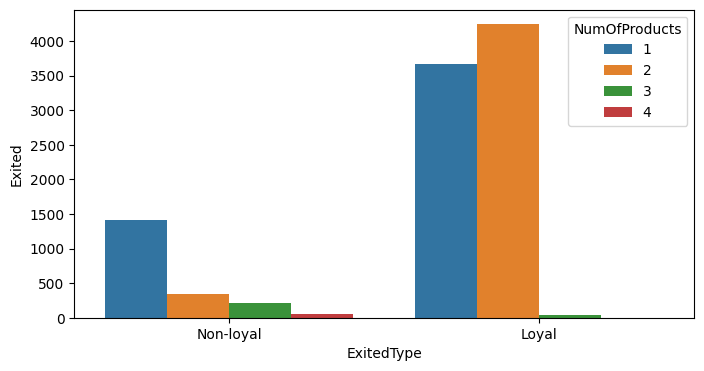

In [21]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

fig = plt.figure(figsize=(8, 4))
bars = sns.barplot(
    data=churn_data,
    x='ExitedType',
    y='Exited',
    hue='NumOfProducts',
    estimator='size'
);

In [22]:
# Наибольший отток клиентов при приобритении одного продукта и 3-4.
# Клиенты, оформившие 4 прдодукта все сменили банк

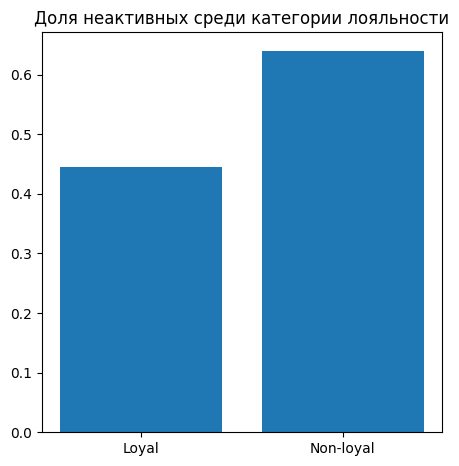

In [23]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму,
# иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

# !У меня возникли сложности с данным заданием.!

data = churn_data.groupby(by='ExitedType').agg(['count', 'sum'])
active_by_exited = data['IsActiveMember'].loc[:, 'sum']
total_by_exited = data['IsActiveMember'].loc[:, 'count']
nonactiv_by_exited = 1 - active_by_exited / total_by_exited

fig = plt.figure(figsize=(4, 4))
bars = fig.add_axes((0, 0, 1, 1))
bars.bar(
    x=nonactiv_by_exited.index,
    height=nonactiv_by_exited
)
bars.set_title('Доля неактивных среди категории лояльности');

# Банку необходимо увеличить число активных клиентов в возрасте старше 40 лет и особое внимание
# при возрасте старше от 48-50 лет, имеющие только 1 продукт

In [24]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму,
# которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

country_exited = churn_data.groupby(by='Geography', as_index=False).mean()
fig = px.choropleth(
    country_exited,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    title='Доля ушедших клиентов',
    width=700,
    height=400,
    color_continuous_scale='temps'
)

fig.show();

# В Германии. Возможно в банке хуже работают с более благосостоятельными клиентами. Ниже 
# фильтр по Германии

C:\Users\Eduard\AppData\Local\Temp\ipykernel_9524\1208967763.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_exited = churn_data.groupby(by='Geography', as_index=False).mean()


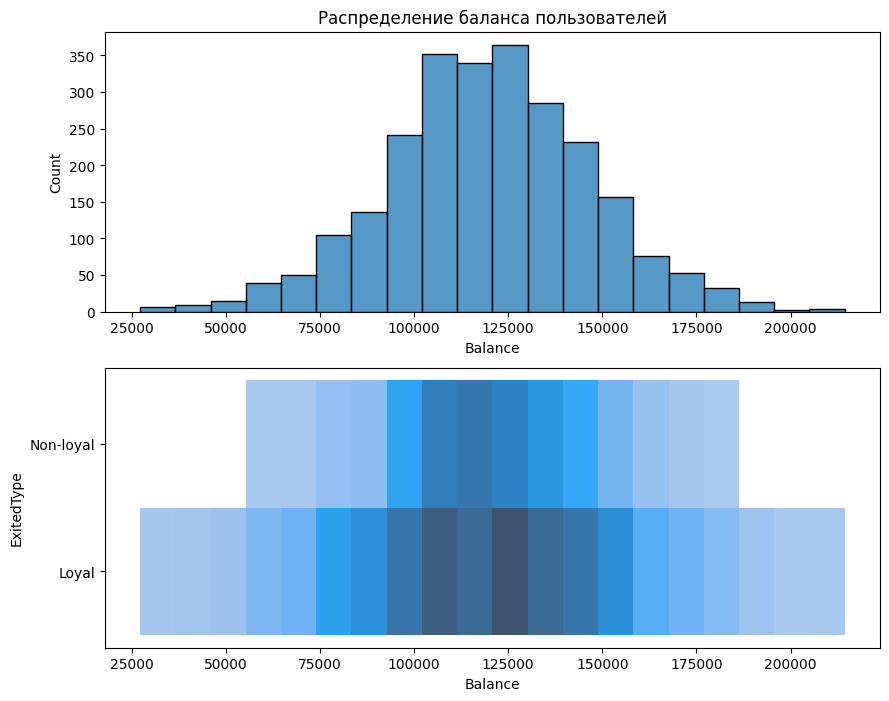

In [25]:
germany = churn_data[(churn_data['Geography'] == 'Germany') & (churn_data['Balance'] > 2500)]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=germany,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей');

sns.histplot(
    data=germany,
    x='Balance',
    y='ExitedType',
    bins=20,
    ax=axes[1]
);

In [26]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь
# функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу 
# CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [27]:
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга
# (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется
# услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее
# по признаку оттока (Exited) — доля ушедших пользователей.

# На основе полученной сводной таблицы постройте тепловую карту с аннотацией.
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [28]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(lambda x: get_credit_score_cat(x)) 


In [29]:
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')

C:\Users\Eduard\AppData\Local\Temp\ipykernel_9524\4226750203.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



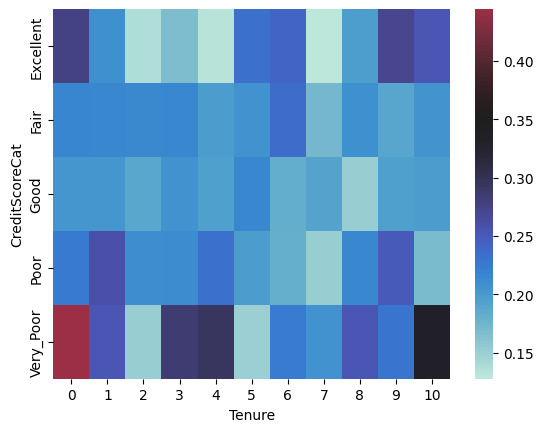

In [30]:
pivot_mean_values = churn_data.groupby(by='CreditScoreCat').mean()
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
heatmap = sns.heatmap(pivot, center=0.35);

# Наибольшя концентрация уходящих клиентов с кредитным рейтингом Very_Poor и Excellent.
# Самая высокая доля клиентов с низким рейтингом на сроках до года (наибольшая), 3-4 года и 10 лет.
# Среди клиентов с высоким рейтингом также высокая концентрация на сроке до года (наибольшая),
# 5-6 и 9-10 лет.